In [14]:
import numpy as np
import matplotlib.pyplot as plt

#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()
from sklearn import neighbors

weights='uniform'

knn = neighbors.KNeighborsClassifier(k,weights=weights)


In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("task6_1_dataset.csv")

In [33]:
x_train= df.iloc[:,[1,2]]

y_train = df.iloc[:,[3]].values.ravel()


In [35]:
k=1
knn = neighbors.KNeighborsClassifier(k)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [38]:
#create an input to predict its label
x_test = [[-4, 8]]
y_pred = knn.predict(x_test)
y_pred

C:\Users\Digree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Digree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0.])

In [62]:
X_train=np.c_[x_train]
scale = 75
alpha = 0.6


[2.]


Text(0.5, 1.0, '3-Class classification (k = 15)\n Test point is predicted as class magenta')

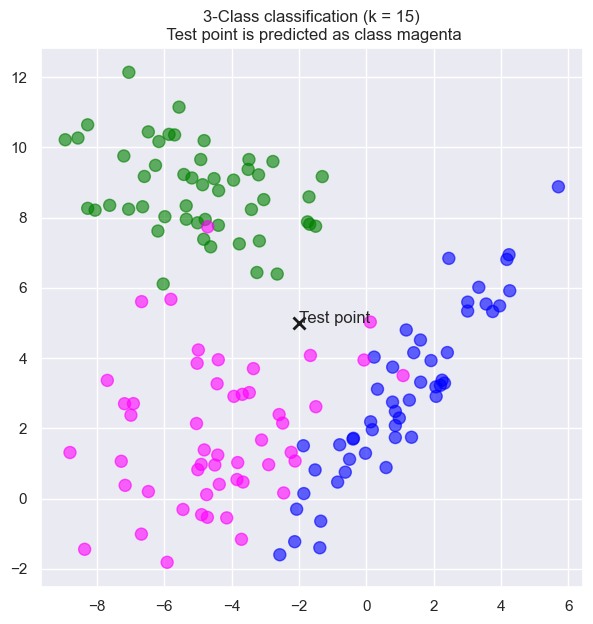

In [71]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])
colors = ['green', 'blue', 'magenta']
fig,ax = plt.subplots(figsize=(7, 7))

#plot the classification of X_train
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=scale,alpha=alpha)

plt.title("3-Class classification (k = {})".format(k))



#to check the predicted label for the X_test
print(y_pred)

#plot the test input
ax.scatter(x_test[0][0], x_test[0][1], marker="x", s=scale, lw=2, c='k')
plt.text(x_test[0][0], x_test[0][1], "Test point")
#as you can see, the test input is displayed in color 'k'
#how could it be colored based on the prediction Y_pred?

ax.set_title("3-Class classification (k = {})\n Test point is predicted as class {}".format(k, colors[y_pred.astype(int)[0]]))

#plot the test input using the predicted color
#ax.scatter(X_test[0][0], X_test[0][1], marker="x", s=scale, lw=2, c=colors[Y_pred.astype(int)[0]])

In [69]:
k=15
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X_train,y_train)
x_test = [[-2, 5]]
y_pred = knn.predict(x_test)
y_pred

C:\Users\Digree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2.])

C:\Users\Digree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(-2, 5, 'Test point')

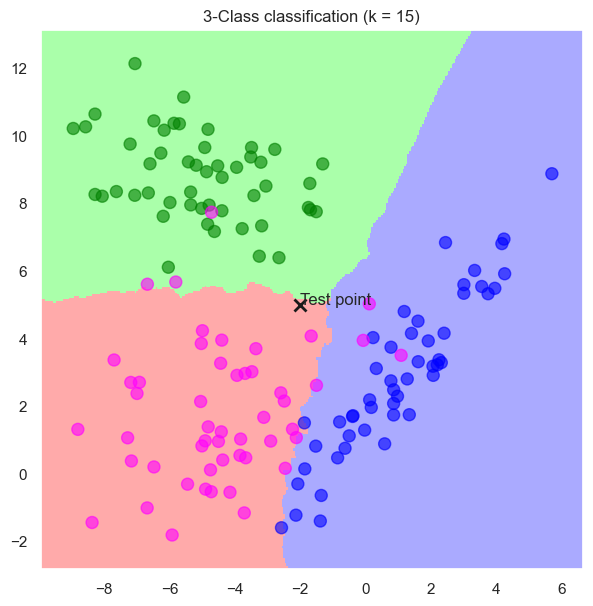

In [89]:
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])
h=0.05
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,alpha=alpha, s=scale)
ax.scatter(x_test[0][0], x_test[0][1], marker="x", s=scale, lw=2, c='k')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))
plt.text(x_test[0][0], x_test[0][1], "Test point")